In [2]:
%pip install -r req.txt

Note: you may need to restart the kernel to use updated packages.


# Imports 

In [3]:
# core libraries
import pandas as pd 
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# deep learning
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# preprocessing
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch.nn.functional as F

# Data Preprocessing

In [4]:
file = "datasets/meta_model_input.csv"
df = pd.read_csv(file)

# Visualize dataset
---
- visualizes sample of first 100 predictions and true angles

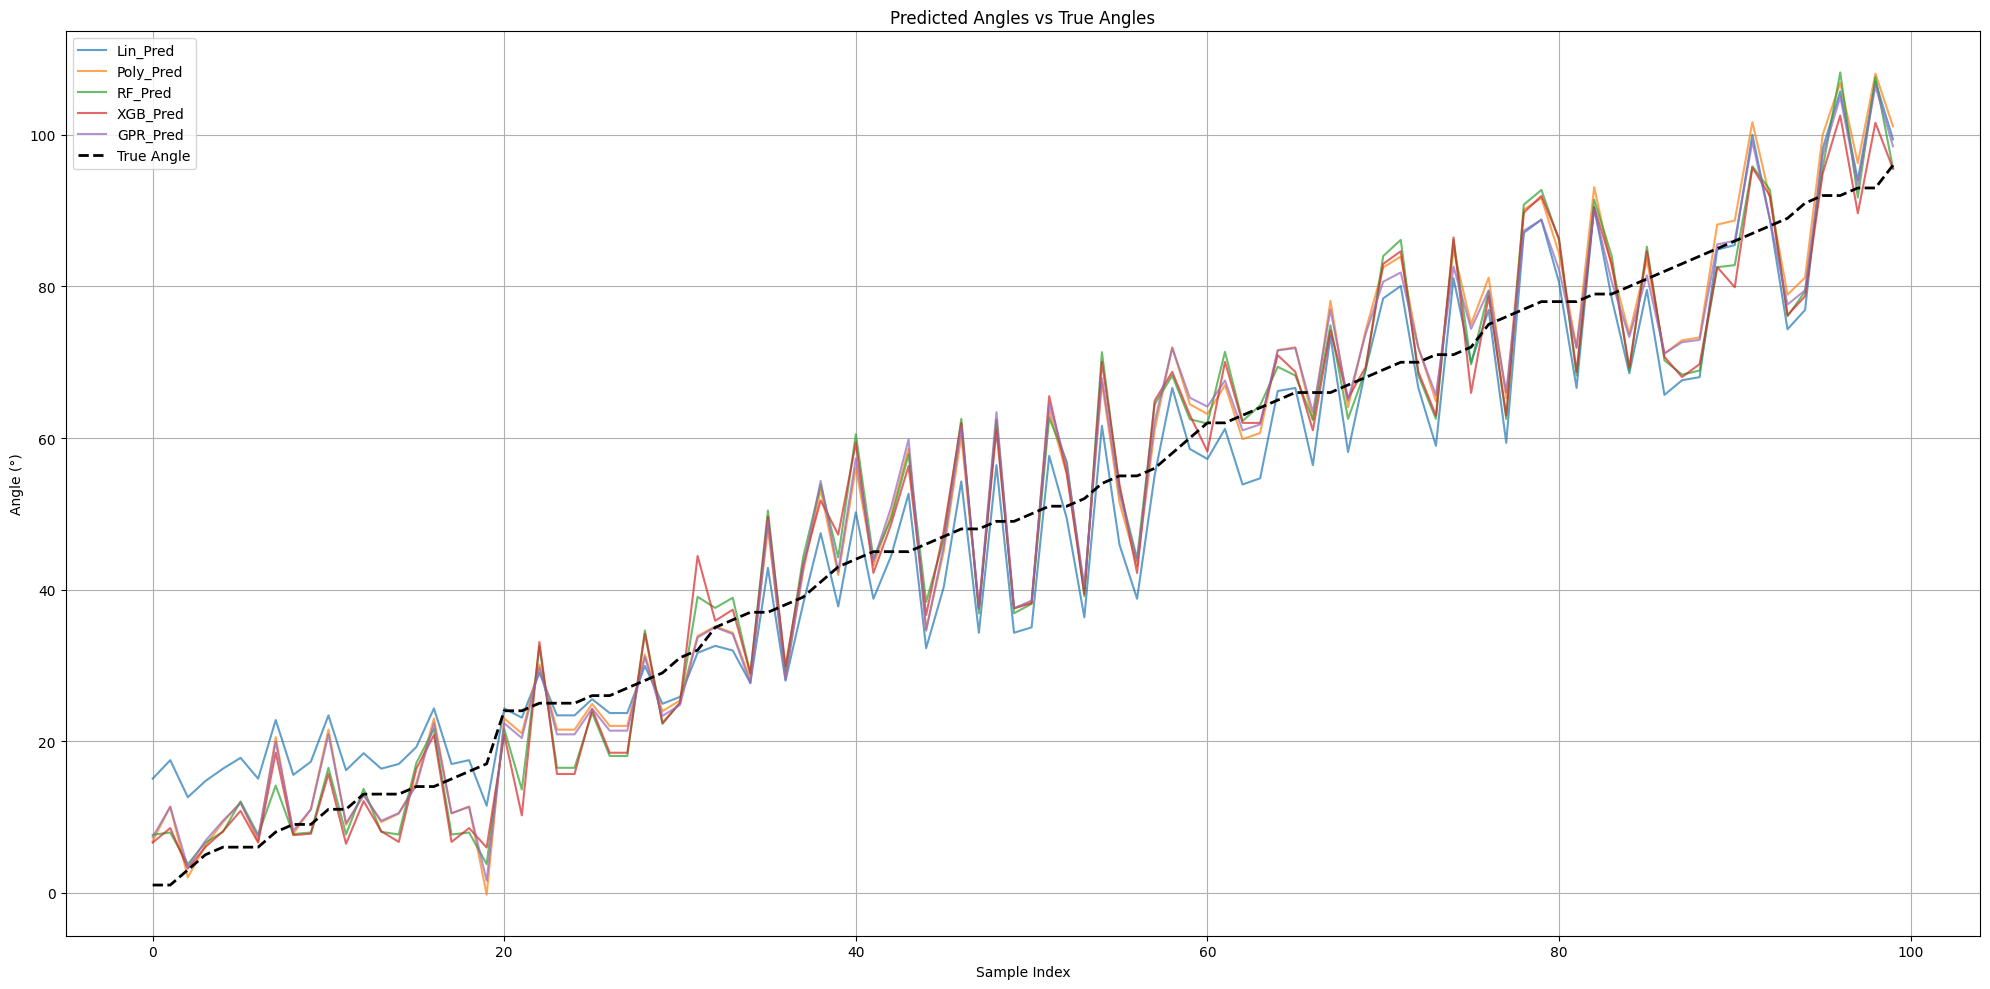

In [28]:
sample_df = df.iloc[:100]  # first 100 rows
plt.figure(figsize=(20, 10))

# Plot each prediction column
for col in sample_df.columns:
    if col.endswith("Pred"):
        plt.plot(sample_df.index, sample_df[col], label=col, alpha=0.7)

# Plot the true angles
plt.plot(sample_df.index, sample_df["True_Angle"], label="True Angle", color="black", linewidth=2, linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Angle (°)")
plt.title("Predicted Angles vs True Angles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

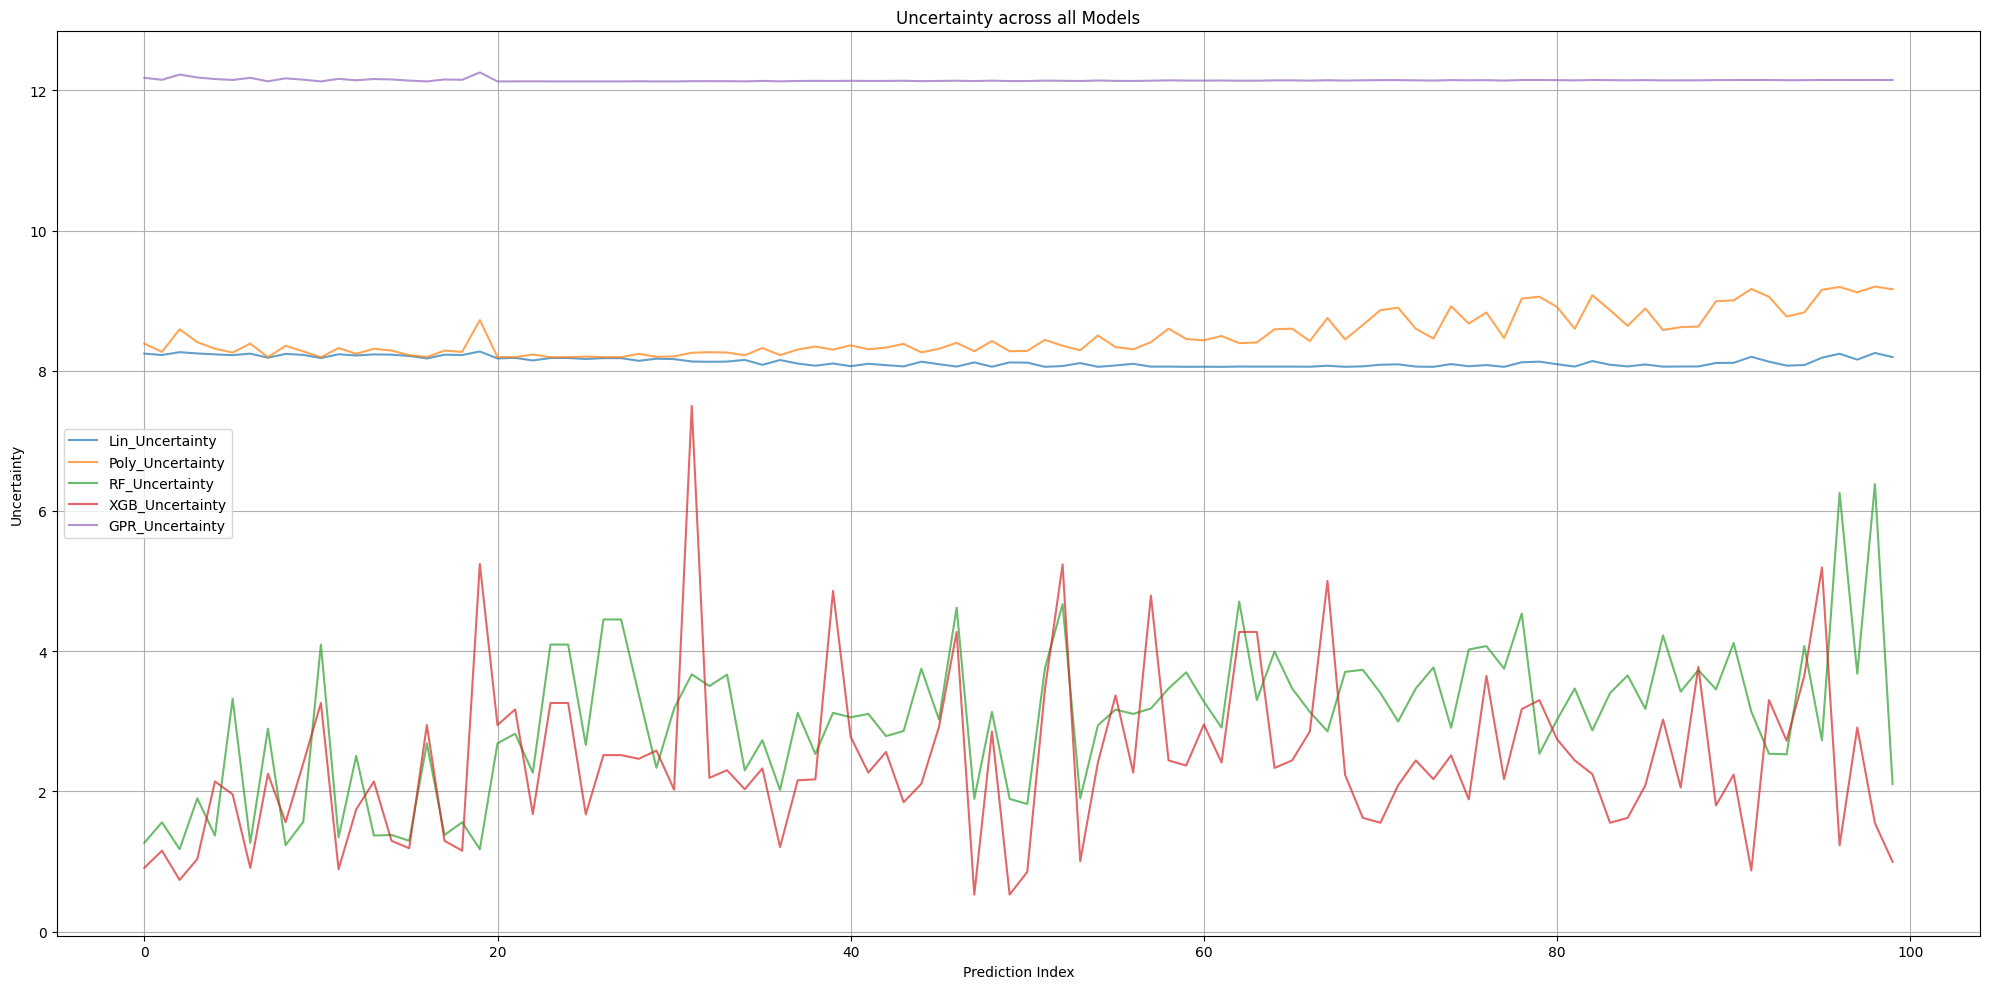

In [29]:
sample_df = df.iloc[:100]  # first 100 rows
plt.figure(figsize=(20, 10))

# Plot each prediction column
for col in sample_df.columns:
    if col.endswith("Uncertainty"):
        plt.plot(sample_df.index, sample_df[col], label=col, alpha=0.7)

# Plot the uncertainty values
plt.xlabel("Prediction Index")
plt.ylabel("Uncertainty")
plt.title("Uncertainty across all Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Min-Max Normalize Uncertainty Values (roughly between 0-1)

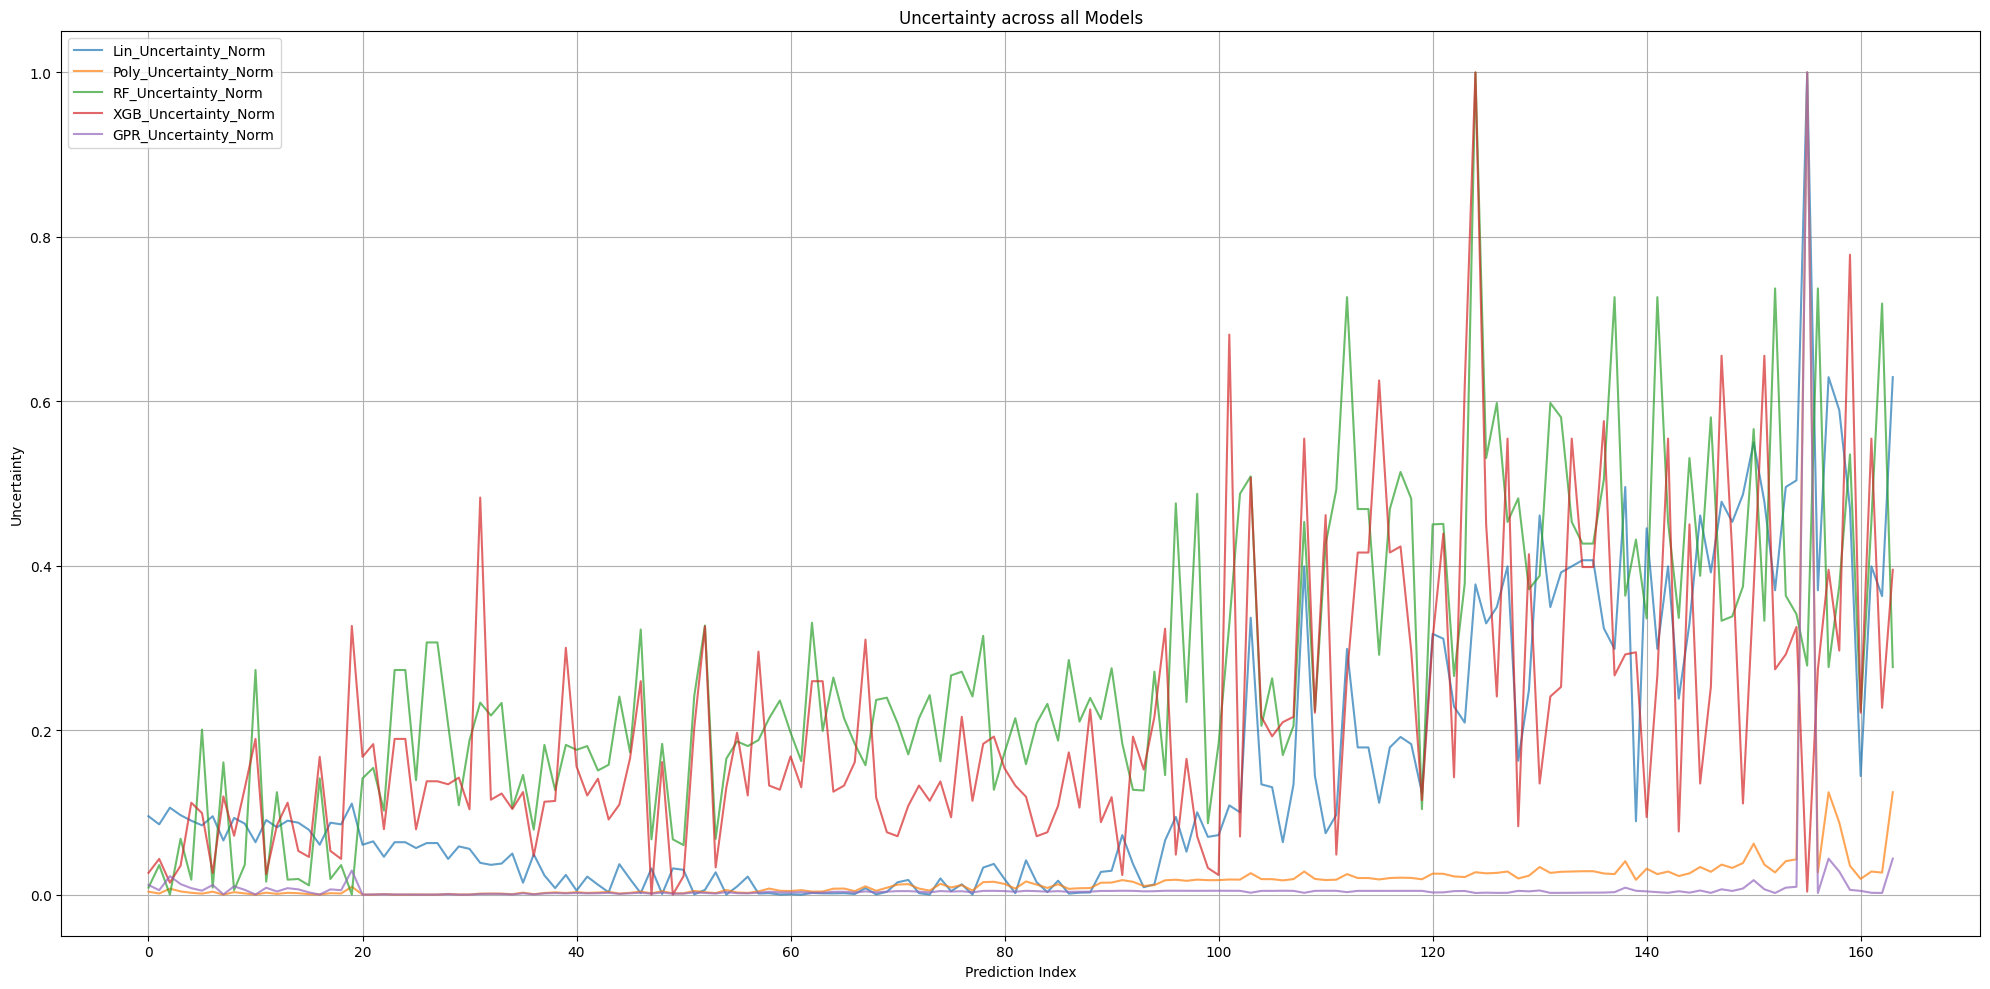

In [30]:
plt.figure(figsize=(20, 10))

# Add column of normalized uncertainity values
for col in df.columns:
    if col.endswith('Uncertainty'):
        df[f'{col}_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

for col in df.columns:
    if col.endswith('Norm'):
         plt.plot(df.index, df[col], label=col, alpha=0.7)

# Plot the true angles
plt.xlabel("Prediction Index")
plt.ylabel("Uncertainty")
plt.title("Uncertainty across all Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Ensemble Class